In [31]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pylab
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score
import pickle
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
data_root = os.path.join(root, 'data')

In [3]:
recovered_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_recovered.csv'))

deaths_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_deaths.csv'))

confirmed_df = pd.read_csv(os.path.join(data_root, 'time_series_covid_19_confirmed.csv'))

In [6]:
open_line_df = pd.read_csv(os.path.join(data_root, 'COVID19_open_line_list.csv'))
line_df = pd.read_csv(os.path.join(data_root, 'COVID19_line_list_data.csv'))
data_df = pd.read_csv(os.path.join(data_root, 'covid_19_data.csv'))

In [13]:
data_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [46]:
agg_data = data_df\
.groupby(['ObservationDate', 'Country/Region'])\
.agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})\
.reset_index()\
.sort_values(by=['Country/Region', 'ObservationDate'])


In [58]:
agg_data['new_confirmed'] = agg_data\
.groupby(['Country/Region'])['Confirmed'].transform(lambda x: x.diff().fillna(0))

agg_data['new_deaths'] = agg_data\
.groupby(['Country/Region'])['Deaths'].transform(lambda x: x.diff().fillna(0))

agg_data['new_recovered'] = agg_data\
.groupby(['Country/Region'])['Recovered'].transform(lambda x: x.diff().fillna(0))

In [59]:
agg_data.columns

Index(['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'new_confirmed', 'new_deaths', 'new_recovered'],
      dtype='object')

In [60]:
agg_data.loc[agg_data['Country/Region']=='Vietnam']

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered,new_confirmed,new_deaths,new_recovered
23,01/23/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0
34,01/24/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0
48,01/25/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0
63,01/26/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0
81,01/27/2020,Vietnam,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
3396,03/19/2020,Vietnam,85.0,0.0,16.0,10.0,0.0,0.0
3571,03/20/2020,Vietnam,91.0,0.0,16.0,6.0,0.0,0.0
3751,03/21/2020,Vietnam,94.0,0.0,17.0,3.0,0.0,1.0
3936,03/22/2020,Vietnam,113.0,0.0,17.0,19.0,0.0,0.0


In [73]:
agg_data['Country/Region'].value_counts()

Thailand               62
Macau                  62
Hong Kong              62
Japan                  62
Taiwan                 62
                       ..
Republic of Ireland     1
St. Martin              1
Bahamas                 1
 Azerbaijan             1
('St. Martin',)         1
Name: Country/Region, Length: 203, dtype: int64

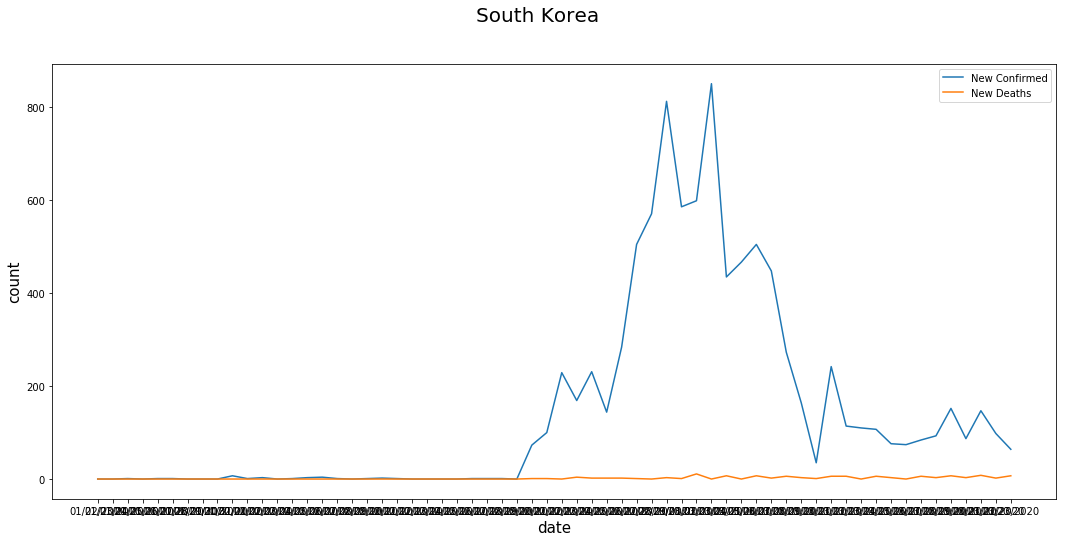

In [74]:
country = 'South Korea'
data = agg_data.loc[agg_data['Country/Region']==country]
fig, ax = plt.subplots(figsize=(18, 8))
ax.plot(data.ObservationDate, data.new_confirmed)
ax.plot(data.ObservationDate, data.new_deaths)
ax.set_xlabel('date', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.legend(['New Confirmed', 'New Deaths'], loc='best')
fig.suptitle(country, fontsize=20)
plt.show()